<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/CoordinateSystem_Spherical2Cartesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Spherical vs Cartesian Coordinate System</h1></b>

Dr. Bingsen Wang

4/5/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
500
550
0


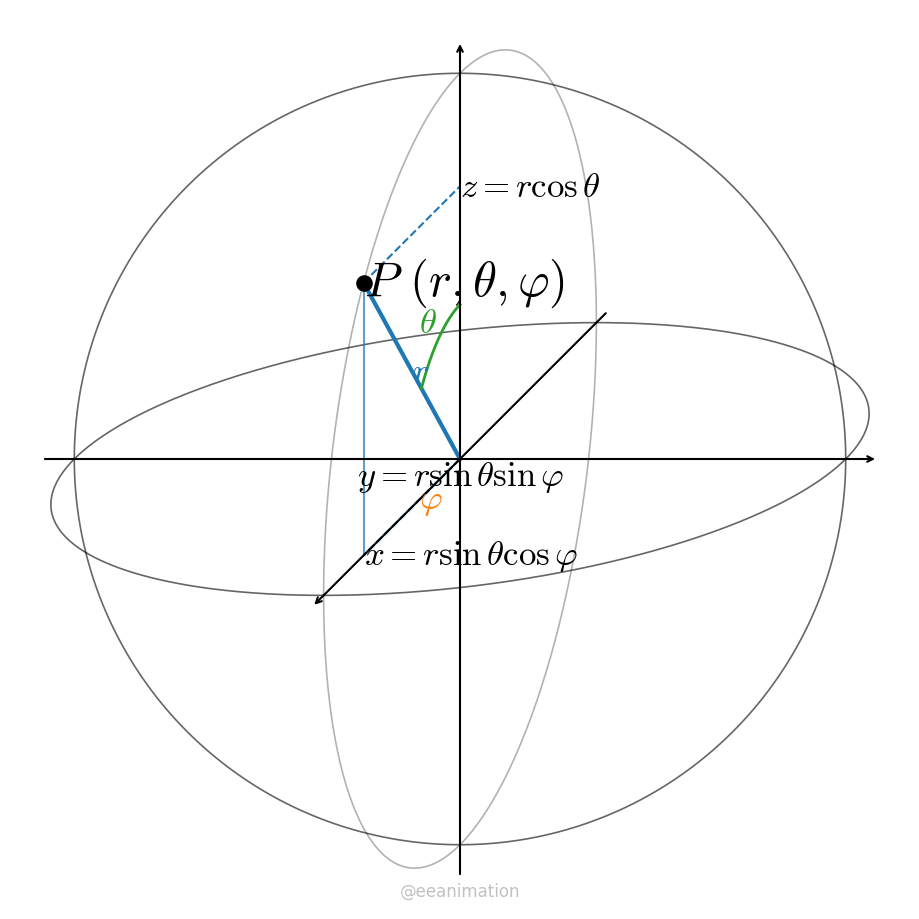

In [1]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def d32(xyz): #from 3d to 2d cabinet projection
  theta=np.pi/4
  x=xyz[1]-xyz[0]*np.sin(theta)/2
  y=xyz[2]-xyz[0]*np.cos(theta)/2
  return np.array([x,y])
Nf=600
r=.6
theta=np.pi/4
theta_lst=np.linspace(0,theta,Nf)
rho = r*np.sin(theta)
phi=np.linspace(0,np.pi*2,Nf)
x=rho*np.cos(phi)
y=rho*np.sin(phi)
phi1=np.linspace(0,np.pi,Nf)
x1=r*np.cos(phi1)
y1=r*np.sin(phi1)
z1=x*0
z2=r*np.cos(theta)+x*0
arc1=[d32([x[k],y[k],0]) for k in range(len(phi))] #points
arc1x=[d32([x[k],0,0]) for k in range(len(phi))] #points
arc1y=[d32([0,y[k],0]) for k in range(len(phi))] #points
arc1phi=[d32([x1[k],y1[k],0]) for k in range(len(phi))] #points
arc1line=d32([x,y,z1]) #line
arc2line=d32([x,y,z2]) #line
arc2=[d32([x[k],y[k],z2[k]]) for k in range(len(phi))] #points

circle_yz = d32([0*phi,r*np.cos(phi),r*np.sin(phi)])
circle_xy = d32([r*np.cos(phi),r*np.sin(phi),0*phi])
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xlim=[-.7,.7];ylim=[-.7,.7]
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim);ax.axis('off')

xyzmax=.65
pmax=[d32((xyzmax,0,0)),d32((0,xyzmax,0)),d32((0,0,xyzmax))]
pmin=[d32((-xyzmax,0,0)),d32((0,-xyzmax,0)),d32((0,0,-xyzmax))]
[ax.annotate('',pmax[k],pmin[k],arrowprops=dict(arrowstyle='->',lw=1.5,color='k')) for k in range(3)] #x,y,z-axis
[ax.plot([circle_yz,circle_xy][k][0],[circle_yz,circle_xy][k][1],c='k',lw=1.2,alpha=.6) for k in range(2)]
ax.text(0,z2[0],r'$z=r\cos\theta$',size=25,va='center')
lines = [ax.plot([],[],c=cl[k],lw=[3,3,2][k])[0] for k in range(3)]
lines += [ax.plot([],[],c=cl[1],lw=2)[0]]
lines += [ax.plot([],[],'--',c=cl[0],lw=1.5)[0] for k in range(4)]
lines += [ax.plot([],[],'-',c=cl[0],lw=1.5,alpha=.7)[0]]
lines += [ax.plot([],[],'-',c='k',lw=1.2,alpha=.3)[0]]
txts=[ax.text(0,0,[r'$r$',r'$\varphi$',r'$\theta$'][k],c=cl[k],size=25,va='center',ha=['left','left','right'][k]) for k in range(3)]
txts+=[ax.text(0,0,r'$P\ (r,\theta,\varphi)$',size=35,va='center')]
txts+=[ax.text(0,0,[r'$x=r\sin\theta\cos\varphi$',r'$y=r\sin\theta\sin\varphi$'][k],size=25,ha=['left','center'][k],va=['center','top'][k]) for k in range(2)]
pointP=ax.scatter(0,0,s=120,marker='o',c='k',zorder=4)
def animate(i):
  if i%50==0: print(i)
  arctheta=d32([r*np.cos(phi[i])*np.sin(theta_lst),r*np.sin(phi[i])*np.sin(theta_lst),r*np.cos(theta_lst)])
  arclongtitude=d32([r*np.cos(phi[i])*np.sin(phi),r*np.sin(phi[i])*np.sin(phi),r*np.cos(phi)])
  pointP.set_offsets(arc2[i])
  lines[0].set_data([arc2[i][0],0],[arc2[i][1],0]) #r
  lines[1].set_data(arc2line[0][:i+1],arc2line[1][:i+1])#arc phi
  lines[2].set_data(arctheta[0]*.4,arctheta[1]*.4) #arc theta
  lines[3].set_data(.2*arc1line[0][:i+1],.2*arc1line[1][:i+1])
  lines[4].set_data([arc2[i][0],0],[arc2[i][1],z2[0]])
  lines[5].set_data([arc1x[i][0],arc1[i][0]],[arc1x[i][1],arc1[i][1]])
  lines[6].set_data([arc1y[i][0],arc1[i][0]],[arc1y[i][1],arc1[i][1]])
  lines[7].set_data([0,arc1[i][0]],[0,arc1[i][1]])
  lines[8].set_data([arc1[i][0],arc2[i][0]],[arc1[i][1],arc2[i][1]])
  lines[9].set_data(arclongtitude[0],arclongtitude[1])
  txts[0].set_position((arc2[i][0]/2,arc2[i][1]/2))
  txts[1].set_position((arc1phi[i][0]*.3,arc1phi[i][1]*.3))
  txts[3].set_position((arc2[i][0],arc2[i][1]))
  txts[4].set_position((arc1x[i][0],arc1x[i][1]))
  txts[5].set_position((arc1y[i][0],arc1y[i][1]))
  txts[2].set_position((d32([.45*r*np.sin(theta/2)*np.cos(phi[i]),.45*r*np.sin(theta/2)*np.sin(phi[i]),.45*r*np.cos(theta/2)])[0],
                        d32([.45*r*np.sin(theta/2)*np.cos(phi[i]),.45*r*np.sin(theta/2)*np.sin(phi[i]),.45*r*np.cos(theta/2)])[1])) #theta
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=len(phi), interval=20)
anim.save("sph2cart.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)